# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [3]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Affine Transformation - Case 2: any three point

[[ 0.93636364  0.31818182 17.27272727]
 [ 0.11818182  0.80909091 33.63636364]]


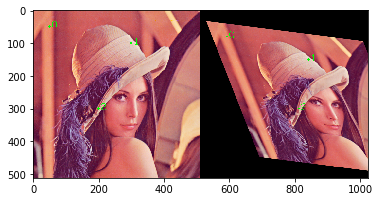

In [26]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32) # np.float32
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = cv2.getAffineTransform(pt1, pt2)
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))
print(M_affine)

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1) # cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    # (img, text, loci, Font, size, color, line width)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
plt.imshow(img_show_affine)

# while True:
#     cv2.imshow('affine transformation', img_show_affine)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break